In [1]:
import numpy as np
import collections

import matplotlib.pyplot as plt
from pymir import mpl_stylesheet
from pymir import mpl_utils
mpl_stylesheet.banskt_presentation(splinecolor = 'black', dpi = 300)

from gradvi.tests import toy_priors
from gradvi.tests import toy_data
from gradvi.models import basis_matrix as gvbm
from gradvi.optimize import moving_average as gvma
from gradvi.inference import Trendfiltering
from mrashpen.utils import R_trendfilter

def saveplot(fig, fileprefix, ext = 'png', plotdir = 'plots'):
    filename = f"{plotdir}/{fileprefix}.{ext}"
    fig.savefig(filename, bbox_inches = 'tight')
    return

plotprefix = 'simple'

In [2]:
n = 512
x = np.linspace(0, 1, n)
np.random.seed(100)

degrees = [0, 1, 2]
nknots  = 4
strue = 0.1
knots = np.linspace(0, 1, nknots+2)[1:-1]

data = dict()

for degree in degrees:
    data[degree] = toy_data.changepoint_from_bspline(x, knots, strue, degree = degree, 
                        signal = "normal", seed = 100,
                        include_intercept = False)

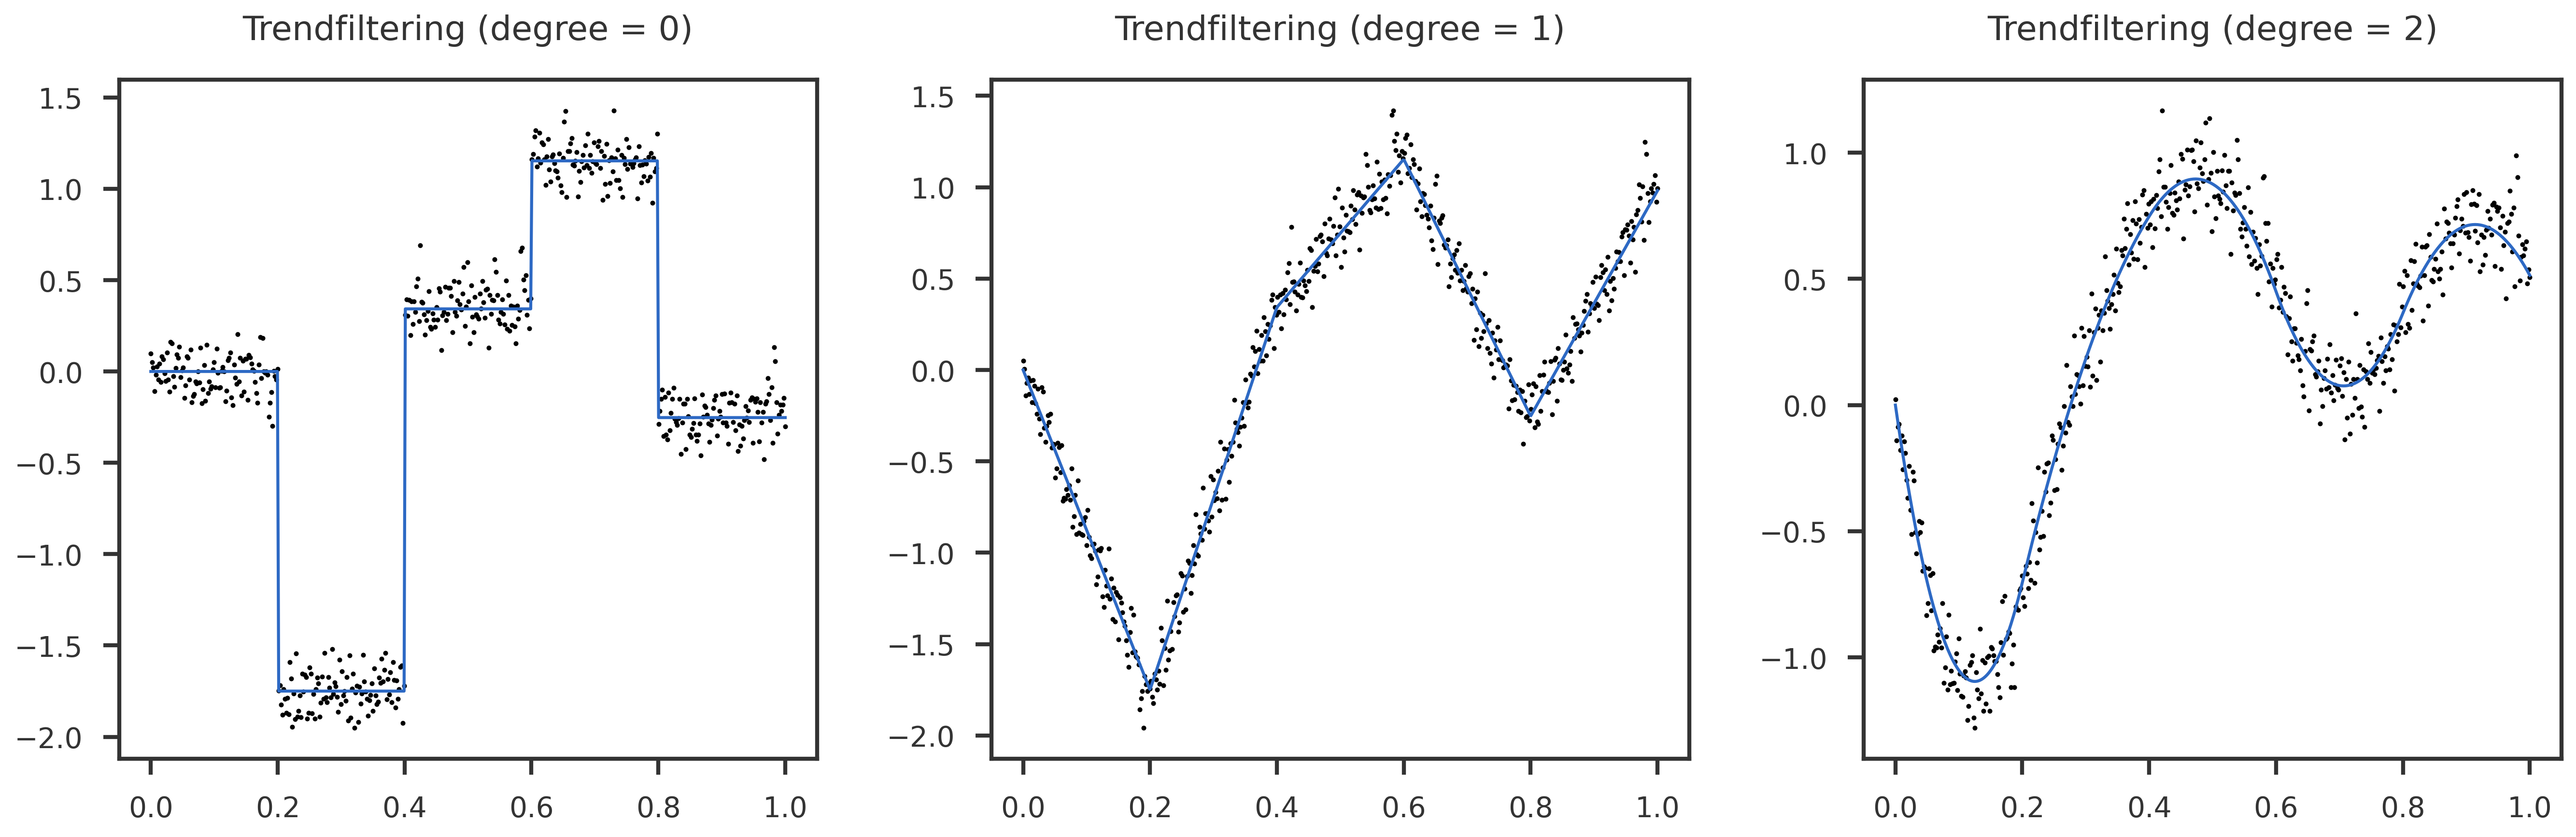

In [3]:
fig = plt.figure(figsize = (18, 6))
for i, d in enumerate(degrees):
    ax = fig.add_subplot(1, 3, i+1)
    ax.scatter(data[d].x, data[d].y, s = 2, color = 'black')
    ax.plot(data[d].x, data[d].ytrue)
    #ax.plot(data[d].x, gvma.moving_average(data[d].y))
    ax.set_title(f"Trendfiltering (degree = {d})", pad = 20)

    
fig.tight_layout()
fig.subplots_adjust(wspace=0.25)
# utils.saveplot(fig, 'trendfiltering_simple_examples')
plt.show()

In [24]:
gv = dict()

for dk, dt in data.items():
    prior_init = toy_priors.get_ash(k = 20, sparsity = 0.9, skbase = 2.)
    #y_init = gvma.moving_average(dt.y)
    #s2_init = np.var(dt.y - y_init)
    #gv_init = Trendfiltering(maxiter = 2000, obj = 'direct', scale_tfbasis = False, 
    #                         optimize_s = False, optimize_b = False)
    #gv_init.fit(dt.y, dk, prior_init, y_init = y_init, s2_init = s2_init)
    #print (f"Degree {dk}. Initialization {gv_init.niter} iterations.")
    
    gv[dk] = Trendfiltering(maxiter = 20000, scale_tfbasis = False)
    #gv[dk].fit(dt.y, dk, gv_init.prior, y_init = gv_init.ypred, s2_init = s2_init)
    gv[dk].fit(dt.y, dk, prior_init)
    print (f"Degree {dk}. Run {gv[dk].niter} iterations.")

Degree 0. Run 1491 iterations.
Degree 1. Run 20000 iterations.
Degree 2. Run 8219 iterations.


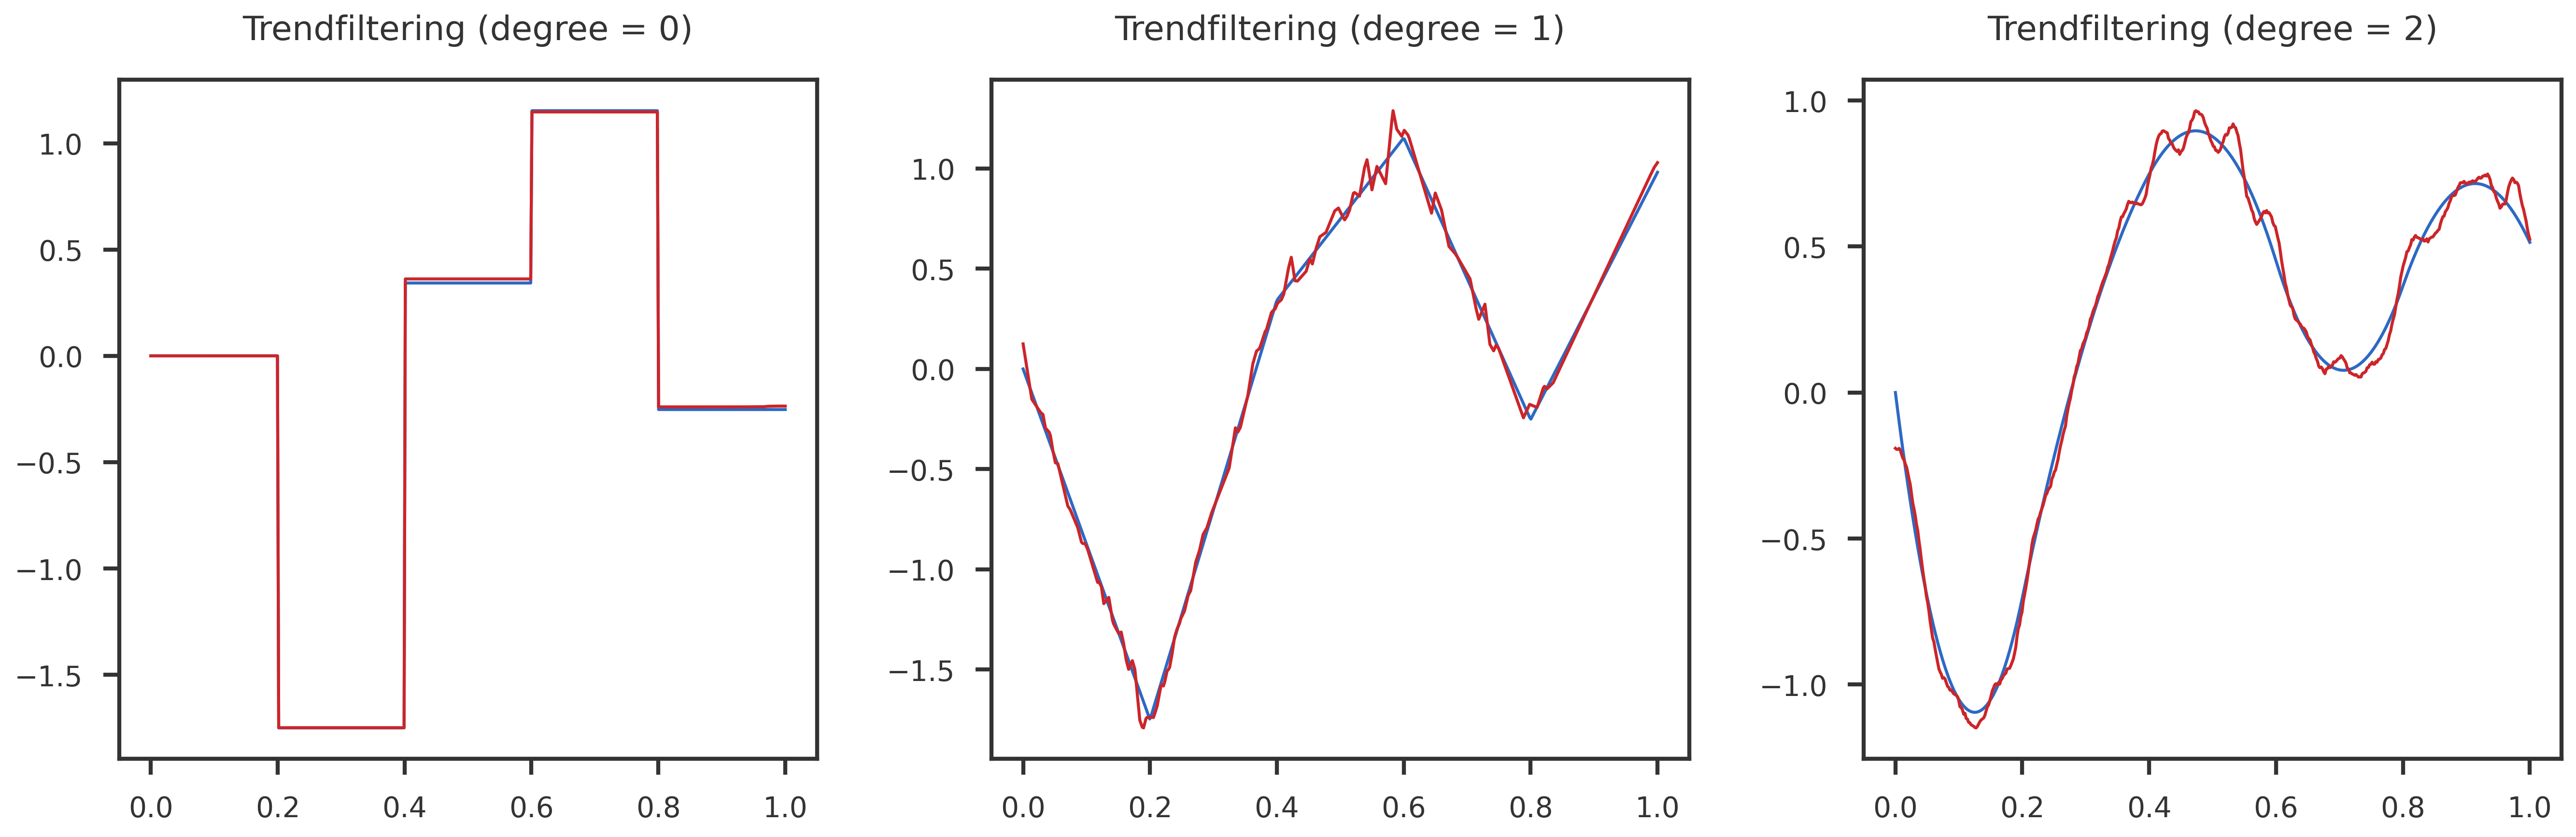

In [20]:
fig = plt.figure(figsize = (18, 6))
for i, d in enumerate(degrees):
    ax = fig.add_subplot(1, 3, i+1)
    #ax.scatter(data[d].x, data[d].y, s = 2, color = 'black')
    ax.plot(data[d].x, data[d].ytrue, label = 'True')
    ax.plot(data[d].x, gv[d].ypred, label = 'GradVI')
    ax.set_title(f"Trendfiltering (degree = {d})", pad = 20)
    
fig.tight_layout()
fig.subplots_adjust(wspace=0.25)
# utils.saveplot(fig, 'trendfiltering_simple_examples')
plt.show()

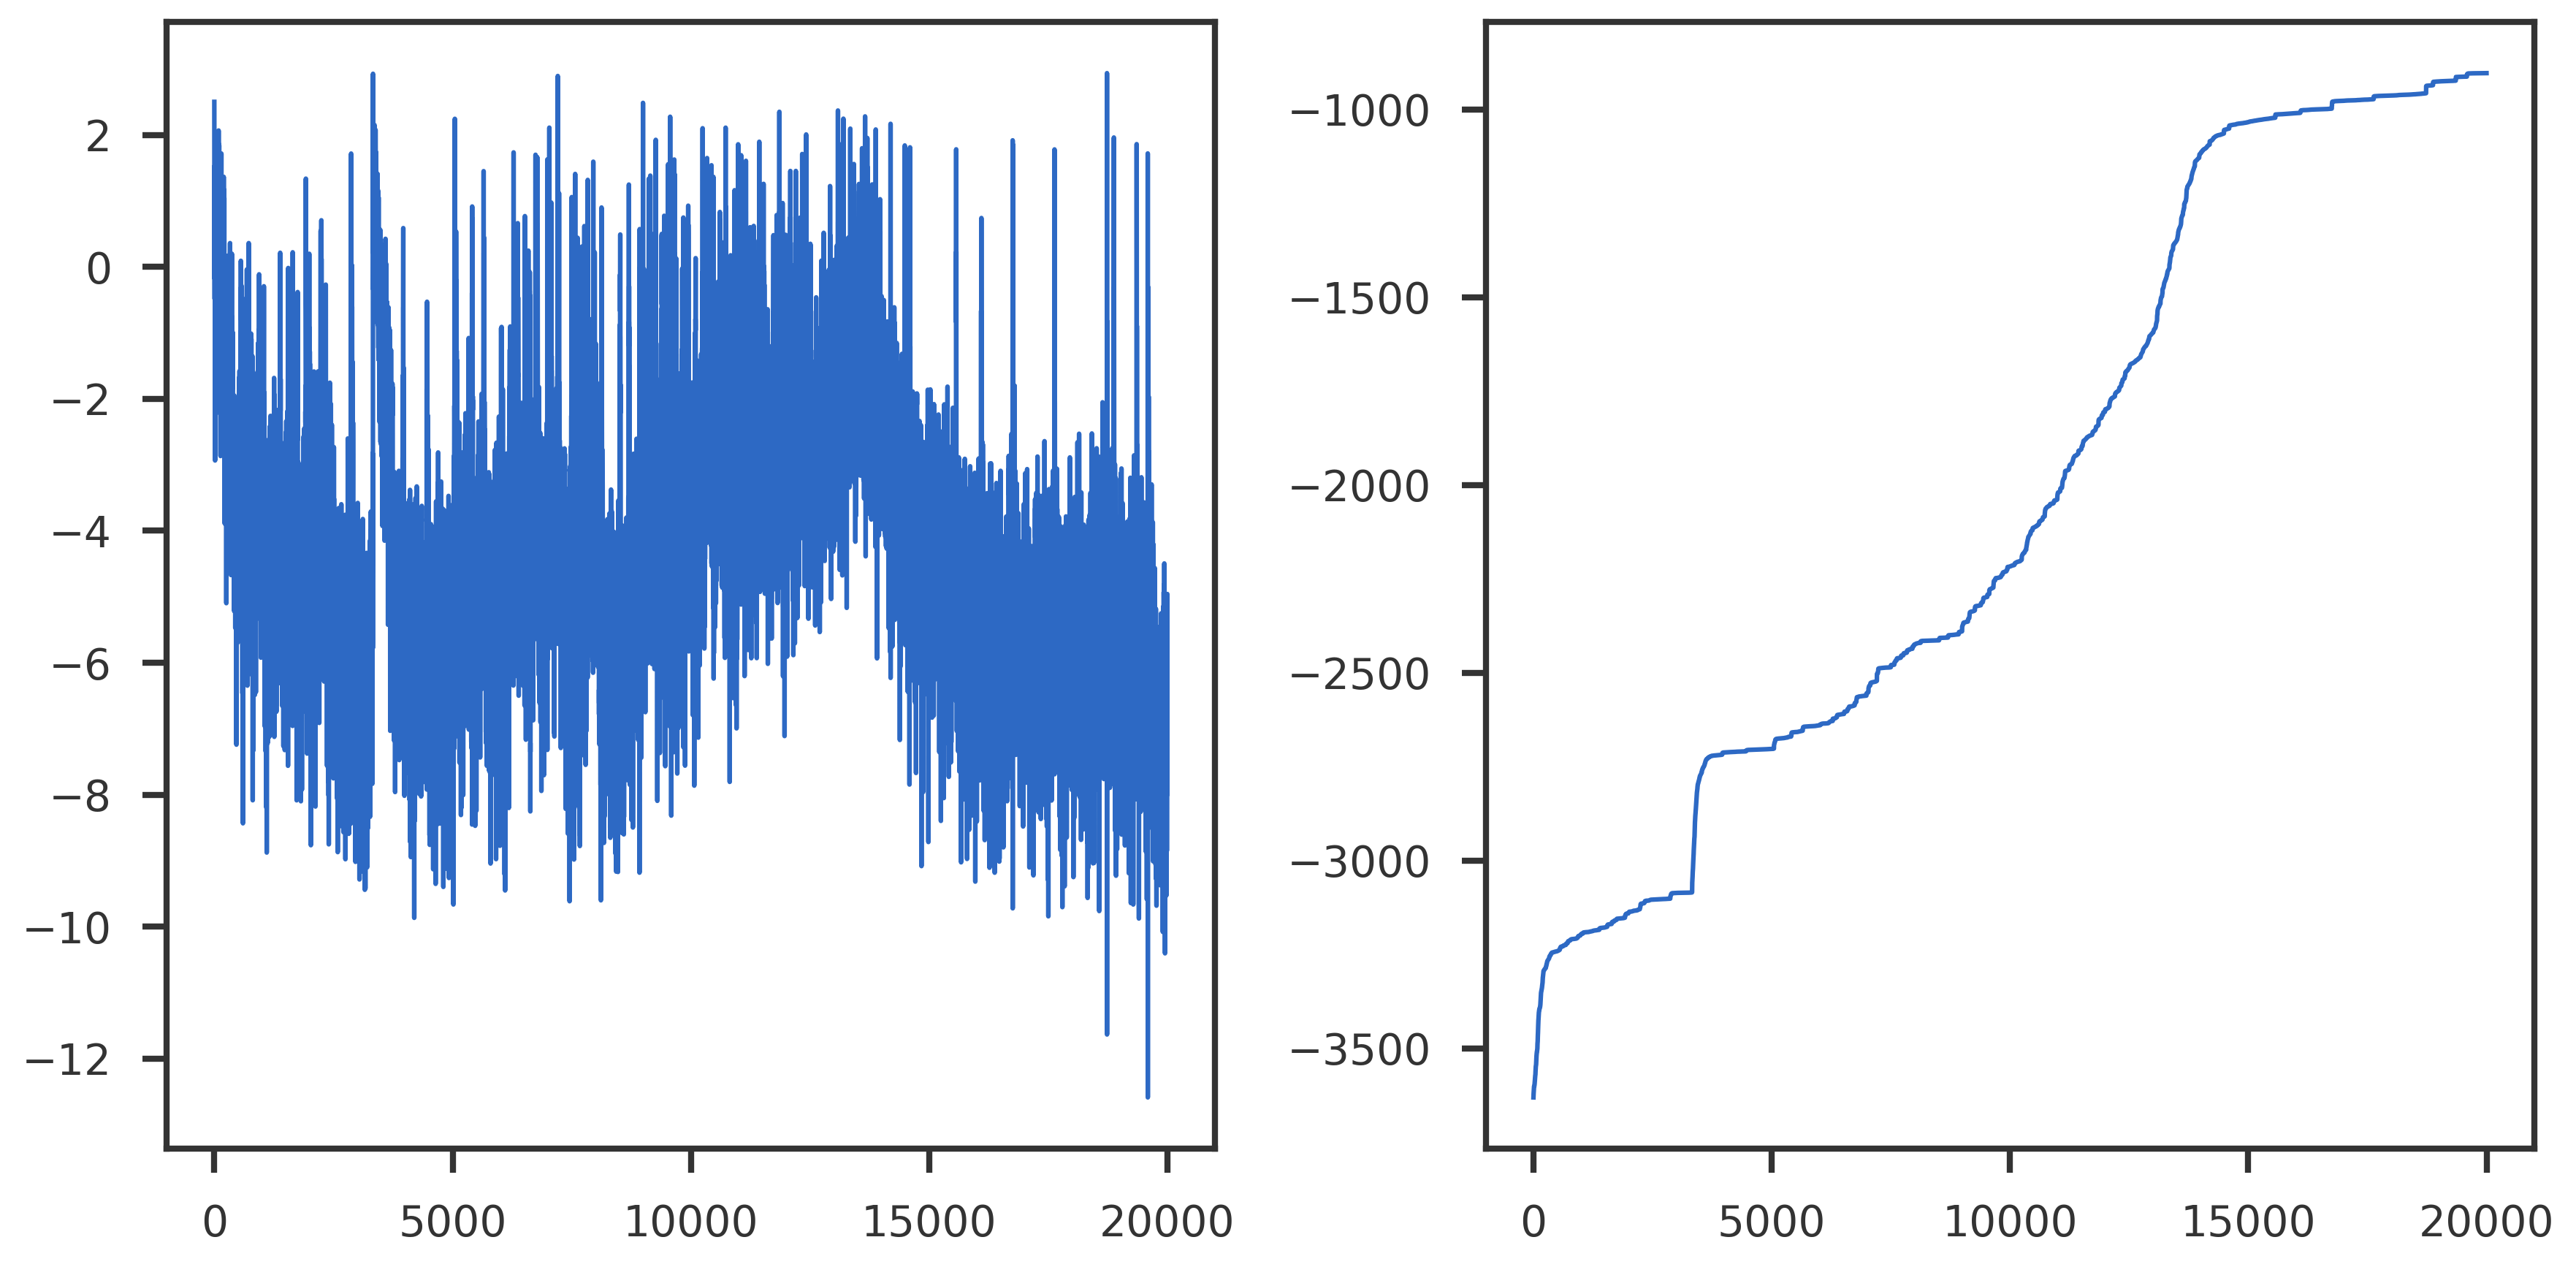

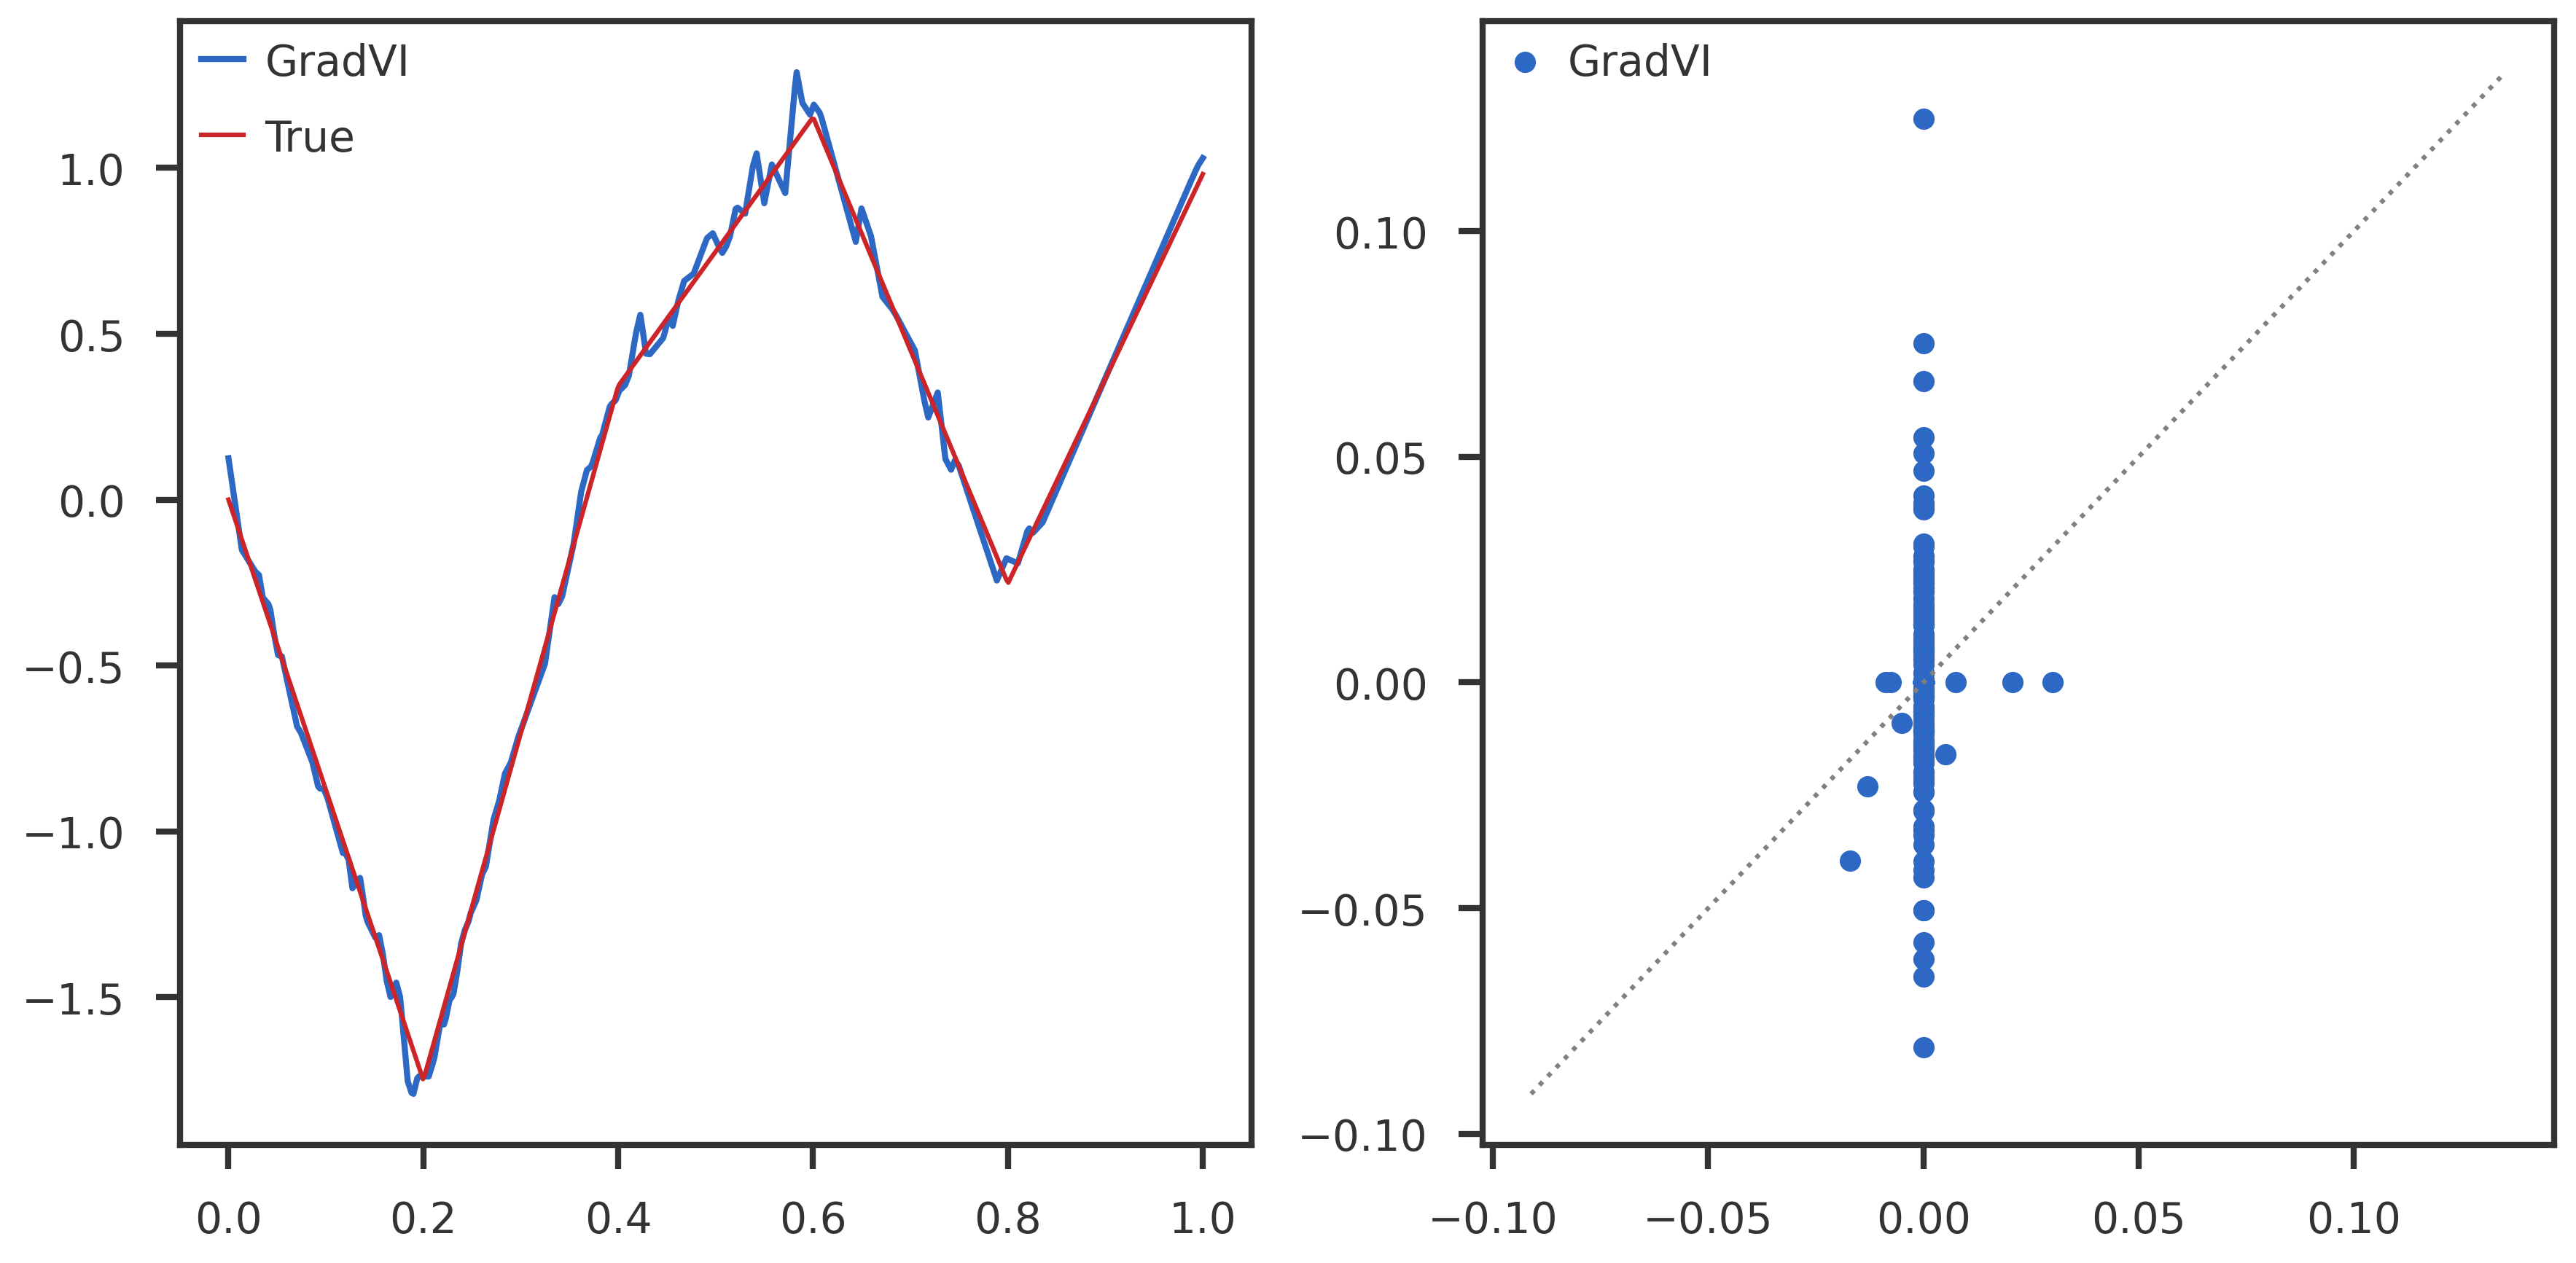

In [21]:
fig = plt.figure(figsize = (12, 6))

dk = 1

log_objdiff = np.log(-np.diff(gv[dk].obj_path))
log_objpath = np.log(gv[dk].obj_path[:gv[dk].niter - 1] - gv[dk].obj_path[gv[dk].niter-1])

ax1 = fig.add_subplot(121)
ax2 = fig.add_subplot(122)
ax1.plot(np.arange(gv[dk].niter - 1), log_objdiff)
ax2.plot(np.arange(gv[dk].niter - 1), -gv[dk].elbo_path[1:])

fig.tight_layout()
plt.show()

fig = plt.figure(figsize = (12, 6))

ax1 = fig.add_subplot(121)
ax2 = fig.add_subplot(122)

ax1.plot(data[dk].x, gv[dk].ypred, lw = 2, label = 'GradVI')
ax1.plot(data[dk].x, data[dk].ytrue, label = 'True')

ax2.scatter(data[dk].btrue, gv[dk].coef, label = 'GradVI')
mpl_utils.plot_diag(ax2)

ax1.legend()
ax2.legend()
fig.tight_layout()
plt.show()

In [22]:
gv[1].prior.w

array([0.76159391, 0.05297375, 0.01836412, 0.01367812, 0.01191473,
       0.01099928, 0.01044087, 0.01006545, 0.0097961 , 0.00959361,
       0.00943598, 0.00930987, 0.00920675, 0.00912092, 0.00904842,
       0.00898639, 0.00893276, 0.00888595, 0.00884476, 0.00880827])

In [23]:
gv[0].prior.sk

array([0.        , 0.03526492, 0.07177346, 0.10956947, 0.14869835,
       0.18920712, 0.23114441, 0.27456063, 0.31950791, 0.36604026,
       0.41421356, 0.4640857 , 0.51571657, 0.5691682 , 0.62450479,
       0.68179283, 0.74110113, 0.80250093, 0.86606598, 0.93187266])

### Genlasso Initialization

In [6]:
s2_init = np.var(dv.y - np.dot(H, gv1.coef))
print(s2_init)

prior = toy_priors.get_ash_scaled(k = 10, sparsity = 0.9, skbase = (dk + 1) * 30)
gv2 = LinearRegression(maxiter = 10000, obj = 'reparametrize', tol = 1e-8)
gv2.fit(H, dv.y, prior, b_init = gv1.coef, s2_init = s2_init)

0.0067387007214962
2022-05-03 20:09:42,170 | gradvi.inference.linear_regression | INFO | Terminated at iteration 1017.


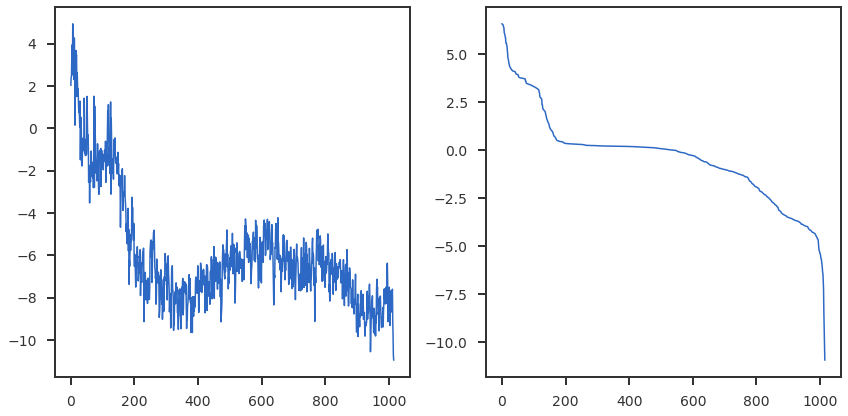

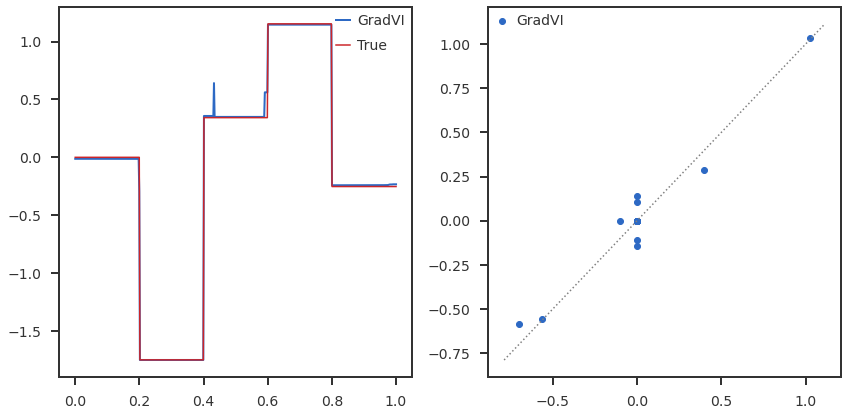

In [7]:
fig = plt.figure(figsize = (12, 6))

log_objdiff = np.log(-np.diff(gv2.obj_path))
log_objpath = np.log(gv2.obj_path[:gv2.niter - 1] - gv2.obj_path[gv2.niter-1])

ax1 = fig.add_subplot(121)
ax2 = fig.add_subplot(122)
ax1.plot(np.arange(gv2.niter - 1), log_objdiff)
ax2.plot(np.arange(gv2.niter - 1), log_objpath)

fig.tight_layout()
fig.show()

fig = plt.figure(figsize = (12, 6))

ax1 = fig.add_subplot(121)
ax2 = fig.add_subplot(122)
#ax1.scatter(dv.x, dv.y, s = 2, color = 'grey')
ax1.plot(dv.x, np.dot(H, gv2.coef) + gv2.intercept, lw = 2, label = 'GradVI')
ax1.plot(dv.x, dv.ytrue, label = 'True')

ax2.scatter(dv.btrue, gv2.coef, label = 'GradVI')
#ax2.scatter(dv.btrue, res['genlasso'][dk].coef, label = 'GenLasso')
mpl_utils.plot_diag(ax2)

ax1.legend()
ax2.legend()
fig.tight_layout()
fig.show()